# Importing libraires

In [ ]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import random


from PIL import Image, ImageOps, ImageFilter

# Hyperparameters

In [ ]:
ROOT_PATH           = os.getcwd()
REPO_LINK           = 'https://github.com/kottoamatsukami/Smart_Barrier'
REPO_NAME           = REPO_LINK.split('/')[-1]
DATASET_PATH        = os.path.join( ROOT_PATH, 'datasets' )
ORIGINAL_DATASET    = os.path.join( DATASET_PATH, 'Emergency_Vehicles' )
OVERSAMPLED_DATASET = os.path.join( DATASET_PATH, 'oversampled' )
IMAGE_WIDTH         = 224
IMAGE_HEIGHT        = 224

# Downloading the Dataset

In [ ]:
os.system(f'git clone {REPO_LINK}')
for object_name in os.listdir( os.path.join( ROOT_PATH, REPO_NAME ) ):
  object_path = os.path.join( ROOT_PATH, REPO_NAME, object_name )
  copy_function = shutil.copytree if os.path.isdir(object_path) else shutil.copy
  try:
    copy_function( src = object_path, dst = os.path.join(ROOT_PATH, object_name) )
  except:
    print(f'The File/Directory[{object_name}] already exists!')
os.system(f'rm -rf ./{REPO_NAME}')

0

# Load train and test set

In [ ]:
assert os.path.exists( ORIGINAL_DATASET ), 'Something went wrong with original dataset'

In [ ]:
def subset_loader(original_path = ORIGINAL_DATASET, label = 'train'):
  csv = pd.read_csv( os.path.join( ORIGINAL_DATASET, f'{label}.csv' ))
  csv['image_names'] = csv['image_names'].apply(
      lambda short_name: os.path.join( ORIGINAL_DATASET, label, short_name )
  )
  if label == 'train':
    csv.columns = [ 'image_path', 'is_emergency' ]
  return csv

In [ ]:
train_csv = subset_loader(label = 'train')
test_csv  = subset_loader(label = 'test' )

In [ ]:
train_csv.sample(5)

,image_path,is_emergency
568,/content/datasets/Emergency_Vehicles/train/195...,1
160,/content/datasets/Emergency_Vehicles/train/116...,0
1133,/content/datasets/Emergency_Vehicles/train/180...,0
1300,/content/datasets/Emergency_Vehicles/train/635...,1
832,/content/datasets/Emergency_Vehicles/train/446...,1


In [ ]:
n = len(train_csv)
num_of_emergency = train_csv['is_emergency'].sum()
print(f"""
Total data length: {n}
is_emergency:      {num_of_emergency}
is_not_emergency:  {n - num_of_emergency}
""")


Total data length: 1646
is_emergency:      681
is_not_emergency:  965



# Augmentation

In [ ]:
os.system(f'rm -rf {OVERSAMPLED_DATASET}')
os.mkdir( OVERSAMPLED_DATASET )

In [ ]:
index = 0
# Train
for row in train_csv.iterrows():
  image_path, is_emergency = row[1]
  image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
  ##########
  # standart
  ##########
  image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # blur
  image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  ############
  # gray scale
  ############
  gray_image = image.convert("L")
  gray_image.save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # mirror
  ImageOps.mirror(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # flip
  ImageOps.flip(gray_image).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1
  # blur
  gray_image.filter(ImageFilter.BoxBlur(5)).save(
      fp=os.path.join( OVERSAMPLED_DATASET, f'{index}_{is_emergency}.jpeg')
  )
  index += 1

# test
# for row in test_csv.iterrows():
#   image_path = row[1][0]
#   image = Image.open(image_path).resize((IMAGE_WIDTH, IMAGE_HEIGHT))
#   ##########
#   # standart
#   ##########
#   image.save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # mirror
#   ImageOps.mirror(image).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # flip
#   ImageOps.flip(image).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # blur
#   image.filter(ImageFilter.BoxBlur(5)).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   ############
#   # gray scale
#   ############
#   gray_image = image.convert("L")
#   gray_image.save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # mirror
#   ImageOps.mirror(gray_image).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # flip
#   ImageOps.flip(gray_image).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1
#   # blur
#   gray_image.filter(ImageFilter.BoxBlur(5)).save(
#       fp=os.path.join( OVERSAMPLED_DATASET, f'{index}.jpeg')
#   )
#   index += 1

In [ ]:
len(os.listdir(OVERSAMPLED_DATASET))

13168

# View dataset

In [ ]:
def load_and_get_label(image_path):
  image = Image.open(image_path)
  label = 'train' if '_' in image_path else 'test'
  return image, label

In [ ]:
images = [
    os.path.join(
        OVERSAMPLED_DATASET,
        random.choice( os.listdir(OVERSAMPLED_DATASET) ))
    for _ in range(25)
]

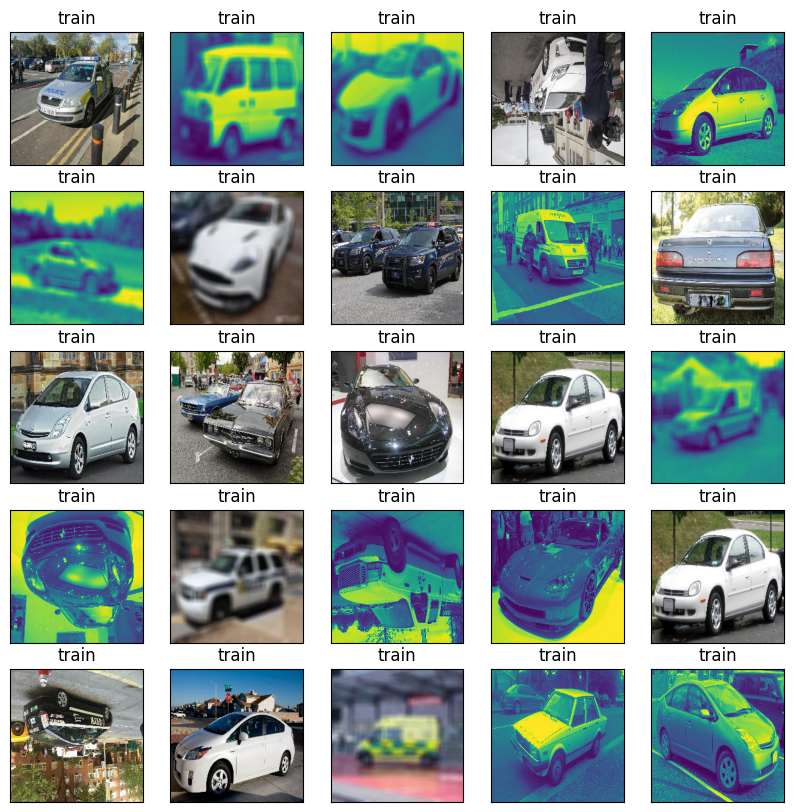

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for row in range(5):
  for col in range(5):
    image, label = load_and_get_label(images[col+row*5])
    axes[row][col].imshow(image)
    axes[row][col].set_title( label )
    axes[row][col].get_xaxis().set_visible( False )
    axes[row][col].get_yaxis().set_visible( False )
plt.show()

In [ ]:
!pip install -U efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
from keras import applications
from keras import callbacks
from keras.models import Sequential

In [ ]:
import efficientnet.keras as efn

model = efn.EfficientNetB7(weights='imagenet')

268317848/268317848 [==============================] - 2s 0us/step


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers

In [ ]:
im = cv2.imread('/content/datasets/Emergency_Vehicles/train/101.jpg')

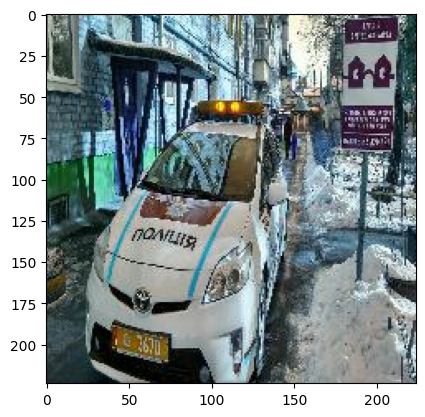

In [ ]:
plt.imshow(im)


In [ ]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
efficient_net = efn.EfficientNetB7(
    weights='imagenet',
    input_shape=(224,224,3),
    include_top=False,
    pooling='max'
)

model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120,activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(units = 120,activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

258434480/258434480 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b7 (Functiona  (None, 2560)              64097680  
 l)                                                              
                                                                 
 dense (Dense)               (None, 120)               307320    
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 64419641 (245.74 MB)
Trainable params: 64

In [ ]:
train_data = pd.DataFrame(columns = ['image_names','emergency_or_not'])

In [ ]:
for picture in os.listdir(OVERSAMPLED_DATASET):
    if (len(picture.split('_'))==2):
        df1 = pd.DataFrame({'image_names' : [picture], 'emergency_or_not' : [(picture.split('_')[1].split('.')[0])]})
        train_data = pd.concat([train_data,df1],ignore_index = True)

In [ ]:
train_data.info

<bound method DataFrame.info of         image_names emergency_or_not
0       6031_0.jpeg                0
1       6520_0.jpeg                0
2       2815_0.jpeg                0
3       7016_1.jpeg                1
4      10792_1.jpeg                1
...             ...              ...
13163  12282_0.jpeg                0
13164   8856_1.jpeg                1
13165   6189_0.jpeg                0
13166   7479_0.jpeg                0
13167  11646_0.jpeg                0

[13168 rows x 2 columns]>

In [ ]:
train_data.emergency_or_not=train_data.emergency_or_not.astype(str)

In [ ]:
train_data = train_data.sample(frac=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe=train_data[:2*len(train_data)//3],directory=OVERSAMPLED_DATASET,x_col='image_names',
                                            y_col='emergency_or_not',class_mode='binary',batch_size=16,
                                            target_size=(224,224))

validation_generator=datagen.flow_from_dataframe(dataframe=train_data[2*len(train_data)//3:],directory=OVERSAMPLED_DATASET,x_col='image_names',
                                                y_col='emergency_or_not',class_mode='binary',batch_size=16,
                                                target_size=(224,224))

Found 8778 validated image filenames belonging to 2 classes.
Found 4390 validated image filenames belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit_generator(
    train_generator,
    epochs = 50,
    steps_per_epoch = 15,
    validation_data = validation_generator,
    validation_steps = 7
)

Epoch 1/50


<ipython-input-29-bf089829da60>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


15/15 [==============================] - 152s 1s/step - loss: 4.2896 - accuracy: 0.5333 - val_loss: 4.1369 - val_accuracy: 0.5536
Epoch 2/50
15/15 [==============================] - 14s 957ms/step - loss: 4.1221 - accuracy: 0.5750 - val_loss: 4.0674 - val_accuracy: 0.6250
Epoch 3/50
15/15 [==============================] - 13s 870ms/step - loss: 4.0589 - accuracy: 0.6083 - val_loss: 3.9936 - val_accuracy: 0.6518
Epoch 4/50
15/15 [==============================] - 13s 885ms/step - loss: 3.9487 - accuracy: 0.6958 - val_loss: 3.9856 - val_accuracy: 0.6518
Epoch 5/50
15/15 [==============================] - 15s 1s/step - loss: 3.9801 - accuracy: 0.6333 - val_loss: 3.8450 - val_accuracy: 0.7321
Epoch 6/50
15/15 [==============================] - 13s 894ms/step - loss: 3.8392 - accuracy: 0.7208 - val_loss: 3.6866 - val_accuracy: 0.8214
Epoch 7/50
15/15 [==============================] - 15s 985ms/step - loss: 3.8047 - accuracy: 0.7125 - val_loss: 3.6470 - val_accuracy: 0.8304
Epoch 8/50
15/1

In [ ]:
model.save('efc_net')

In [ ]:
!zip -r /content/efc_net.zip /content/efc_net

  adding: content/efc_net/ (stored 0%)
  adding: content/efc_net/saved_model.pb (deflated 92%)
  adding: content/efc_net/assets/ (stored 0%)
  adding: content/efc_net/variables/ (stored 0%)
  adding: content/efc_net/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/efc_net/variables/variables.index (deflated 78%)
  adding: content/efc_net/keras_metadata.pb (deflated 96%)
  adding: content/efc_net/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/efc_net.zip")